<a href="https://colab.research.google.com/github/krvneet/Ml-Project-1/blob/main/toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)

Current working directory: /content


In [41]:
import os
for dirname, _, filenames in os.walk('/content/toxic '):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/toxic /test.csv
/content/toxic /sample_submission.csv
/content/toxic /test_labels.csv
/content/toxic /train.csv


In [40]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'toxic ', '.ipynb_checkpoints', 'drive', 'sample_data']


In [80]:
train_data = pd.read_csv('/content/toxic /train.csv',index_col='id')
train_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


We need to found which length of message we will analyse for prediction

# New Section

In [43]:
train_data['comment_length'] = train_data['comment_text'].apply(lambda row: len(row))
train_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
id,,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


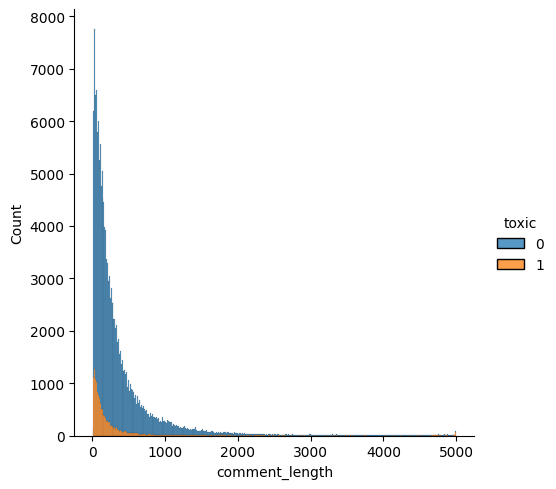

In [44]:
import seaborn as sns
sns.displot(
    data=train_data,
    x="comment_length",
    hue='toxic',
    multiple="stack",
)

In [45]:
train_data.drop('comment_length', axis=1, inplace=True)

In [46]:
train_data[train_data['toxic']==1].head(2)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0


In [47]:
cols_target = []
i = 0
for col in train_data.columns:
    if i == 0 or i == 1:
        i += 1
        continue
    cols_target.append(col)

In [48]:
cols_target

['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [49]:
train_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
len(train_data['toxic'].drop_duplicates())

2

In [51]:
train_data[train_data['comment_text'].isnull()]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,


In [52]:
print('Total rows in train is {}'.format(len(train_data)))
print(train_data[cols_target].sum())

Total rows in train is 159571
severe_toxic     1595
obscene          8449
threat            478
insult           7877
identity_hate    1405
dtype: int64


In [53]:
data = train_data[cols_target]

<Axes: title={'center': 'Correlation of features & targets'}>

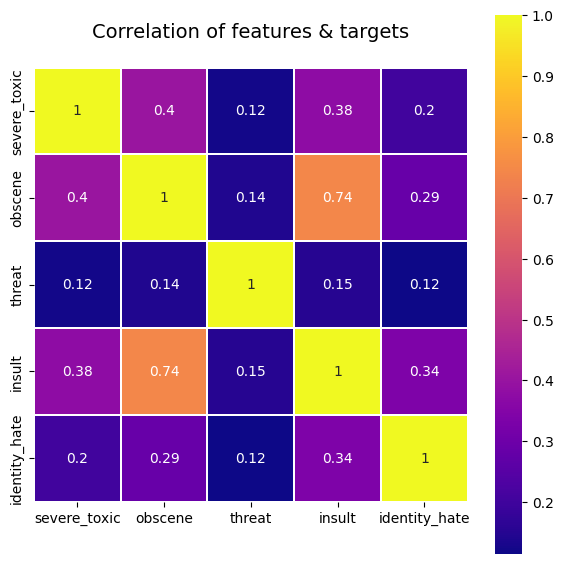

In [54]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [81]:
train_data['comment_length'] = train_data['comment_text'].apply(lambda row: len(row))


In [56]:
toxic_data = train_data[train_data['toxic'] == 1]
toxic_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
id,,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,319
0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,57
001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648
00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,40


In [57]:
print(
    'max', toxic_data['comment_length'].max(),
    'min', toxic_data['comment_length'].min(),
    'mean', toxic_data['comment_length'].mean(),
    'median', toxic_data['comment_length'].median(),
    '75%', toxic_data['comment_length'].quantile(0.75),
)

max 5000 min 8 mean 295.24604420034 median 123.0 75% 271.0


In [82]:
toxic_data = toxic_data[toxic_data['comment_text'].str.len() <= 50]

In [83]:
toxic_data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
id,,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,40
00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1,42
0086998b34865f93,"Fuck you, block me, you faggot pussy!",1,0,1,0,1,0,37
00ab65775c601cf9,Atheism is full of bias shit,1,0,0,0,0,0,28
...,...,...,...,...,...,...,...,...
fcf5a6ad5918f164,your boring \n\nand retarded two,1,0,0,0,0,0,30
fdc92e571d39e7e1,Yeah i no it sucks.,1,0,0,0,0,0,19
fdce660ddcd6d7ca,I think he is a gay fag!!!,1,0,0,0,0,1,26


In [87]:
toxic_data.size

23536

In [84]:
max_comment_len = 50

In [78]:
test_data = pd.read_csv('/content/toxic /test.csv',index_col='id')
test_data.head()

,comment_text
id,
00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
0000247867823ef7,== From RfC == \n\n The title is fine as it is...
00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
00017563c3f7919a,":If you have a look back at the source, the in..."
00017695ad8997eb,I don't anonymously edit articles at all.


In [79]:
test_data.size

153164

In [104]:
test_data = test_data[test_data['comment_text'].str.len() < 50]

In [105]:
test_data.size

59654

In [106]:
test_labels_data = pd.read_csv('/content/toxic /test_labels.csv',index_col='id')
test_labels_data.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,-1,-1,-1,-1,-1,-1
0000247867823ef7,-1,-1,-1,-1,-1,-1
00013b17ad220c46,-1,-1,-1,-1,-1,-1
00017563c3f7919a,-1,-1,-1,-1,-1,-1
00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [107]:
test_labels_data.size

918984

In [108]:
# test_data = test_data.join(test_labels_data)
# test_data = test_data[test_data['toxic'] != -1]
test_data.head()

ValueError: ignored

In [94]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D, TextVectorization


In [95]:
num_words = 10000
encoder = TextVectorization(max_tokens=num_words)
encoder.adapt(train_data['comment_text'].values)

model_lstm = Sequential([
    encoder,
    Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        mask_zero=True,
        input_length=max_comment_len,
    ),
    SpatialDropout1D(0.5),
    LSTM(40, return_sequences=True),
    LSTM(40),
    Dense(6, activation='sigmoid'),
])

In [96]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [99]:
model_lstm_save_path = '/kaggle/working/toxic_model_lstm'
checkpoint_callback_lstm = ModelCheckpoint(
    model_lstm_save_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    save_format='tf',
)

In [100]:
x_train = train_data['comment_text'].values
y_train = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [101]:
x_train[:2]

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"],
      dtype=object)

In [115]:
y_train[:2]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [118]:
history_lstm = model_lstm.fit(
    x_train,
    y_train,
    epochs=2, # 15
    batch_size=512,
    validation_split=0.2,
    callbacks=[checkpoint_callback_lstm],
)

Epoch 1/2
250/250 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.9923 - auc: 0.9783
Epoch 1: val_accuracy did not improve from 0.99395
250/250 [==============================] - 2073s 8s/step - loss: 0.0516 - accuracy: 0.9923 - auc: 0.9783 - val_loss: 0.0541 - val_accuracy: 0.9924 - val_auc: 0.9775
Epoch 2/2
250/250 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.9896 - auc: 0.9807
Epoch 2: val_accuracy did not improve from 0.99395
250/250 [==============================] - 2044s 8s/step - loss: 0.0492 - accuracy: 0.9896 - auc: 0.9807 - val_loss: 0.0523 - val_accuracy: 0.9931 - val_auc: 0.9763


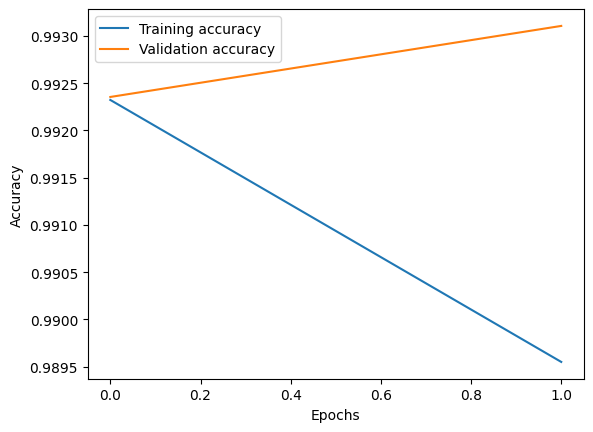

In [119]:
plt.plot(history_lstm.history['accuracy'],
         label='Training accuracy')
plt.plot(history_lstm.history['val_accuracy'],
         label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [127]:
test_data = test_data[test_data['comment_text'].str.len() <= 50]

In [131]:
test_data = test_data[:10000]

In [132]:
x_test = test_data['comment_text'].values
y_test = test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [133]:
model_lstm.evaluate(x_test, y_test, verbose=1)

267/267 [==============================] - 2s 9ms/step - loss: 0.1544 - accuracy: 0.9653 - auc: 0.9454


[0.15437674522399902, 0.9652663469314575, 0.9453745484352112]

In [134]:
saved_model = load_model(model_lstm_save_path)
saved_model.evaluate(x_test, y_test, verbose=1)

267/267 [==============================] - 5s 6ms/step - loss: 0.1509 - accuracy: 0.9745 - auc: 0.9436


[0.1509396880865097, 0.9745364785194397, 0.9435692429542542]

In [135]:
!zip -r /kaggle/working/toxic_model_lstm.zip /kaggle/working/toxic_model_lstm

  adding: kaggle/working/toxic_model_lstm/ (stored 0%)
  adding: kaggle/working/toxic_model_lstm/fingerprint.pb (stored 0%)
  adding: kaggle/working/toxic_model_lstm/variables/ (stored 0%)
  adding: kaggle/working/toxic_model_lstm/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: kaggle/working/toxic_model_lstm/variables/variables.index (deflated 61%)
  adding: kaggle/working/toxic_model_lstm/assets/ (stored 0%)
  adding: kaggle/working/toxic_model_lstm/saved_model.pb (deflated 89%)
  adding: kaggle/working/toxic_model_lstm/keras_metadata.pb (deflated 89%)


In [136]:
test_data[test_data['toxic']==1][:5]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",1,0,1,0,1,0
00950f0fae33869f,HE IS A GHAY ASS FUCKER@@!!,1,0,1,0,1,1
00991697be5ed76a,Simple: You are stupid!,1,0,1,0,1,0
00b3813b966af7e8,what the hell are you doing,1,0,0,0,0,0
00c070a4753b0fa3,"Hey shithead, stop vandilizing articles.",1,0,1,0,1,0


In [137]:
test_data[test_data['toxic']==1][:5]['comment_text'].values

array([':Fuck off, you anti-semitic cunt.  |',
       'HE IS A GHAY ASS FUCKER@@!!', 'Simple: You are stupid!',
       'what the hell are you doing',
       'Hey shithead, stop vandilizing articles.'], dtype=object)

In [138]:
test_labels = saved_model.predict(test_data[test_data['toxic']==1][:5]['comment_text'].values)
for labels in test_labels:
    print([ round(lbl, 2) for lbl in labels])

1/1 [==============================] - 4s 4s/step
[0.95, 0.42, 0.91, 0.12, 0.82, 0.23]
[0.9, 0.1, 0.72, 0.03, 0.62, 0.1]
[0.74, 0.07, 0.49, 0.04, 0.42, 0.09]
[0.83, 0.03, 0.46, 0.02, 0.43, 0.06]
[0.12, 0.0, 0.02, 0.0, 0.03, 0.01]


In [139]:
quotes = [
    "It takes a great deal of bravery to stand up to your enemies",
    "No, no. This kind of mark cannot be seen. It lives in your very skin… Love, Harry. Love.",
    "I would trust Hagrid with my own life.",
    "It is not our abilities that show what we truly are. It is our choices.",
]
not_toxic_prediction = saved_model.predict(quotes)
for labels in not_toxic_prediction:
    print([ round(lbl, 2) for lbl in labels])

1/1 [==============================] - 0s 43ms/step
[0.01, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.06, 0.0, 0.01, 0.0, 0.01, 0.0]
[0.01, 0.0, 0.0, 0.0, 0.0, 0.0]


In [140]:
quotes = [
    "Maybe If The Fat Lump Had Given This A Squeeze, He'd Have Remembered To Fall On His Fat Ass.",
    "No One Asked Your Opinion, You Filthy Little Mudblood.",
    "Didn't Mummy Ever Tell You It Was Rude To Eavesdrop, Potter? Oh, Yeah. She Was Dead Before You Could Wipe The Drool Off Your Chin.",
    "You're Gonna Regret This! You And Your Bloody Chicken!",
    "I'm going to kill you, Harry Potter. I'm going to destroy you.",
]

toxic_prediction = saved_model.predict(quotes)
for labels in toxic_prediction:
    print([ round(lbl, 2) for lbl in labels])

1/1 [==============================] - 0s 44ms/step
[0.87, 0.04, 0.58, 0.02, 0.53, 0.07]
[0.51, 0.01, 0.1, 0.01, 0.15, 0.02]
[0.46, 0.0, 0.08, 0.0, 0.12, 0.02]
[0.91, 0.08, 0.68, 0.03, 0.61, 0.09]
[0.75, 0.02, 0.32, 0.01, 0.36, 0.05]


In [142]:
import tensorflow as tf

model = saved_model  # Your TensorFlow model
model.save('/content/toxic /')  # Save the entire model